In [23]:
from bs4 import BeautifulSoup
import os
import requests

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
url = "https://www.transfermarkt.us/kevin-de-bruyne/leistungsdatendetails/spieler/88755/saison//verein/0/liga/0/wettbewerb/GB1/pos/0/trainer_id/0"
response = requests.get(url,headers=headers)
response.text[:100] # Access the HTML with the text property
soup = BeautifulSoup(response.content, 'html.parser')

In [26]:
div = soup.findAll('div', class_='responsive-table')[1]

In [27]:

table = div.find('table')

In [ ]:
print(table.prettify())

In [97]:
            index=0 
            n_columns = 0
            n_rows=0
            column_names = []

In [98]:
            match=[]
            date=[]
            venue=[]
            forr=[]
            opp=[]
            result=[]
            pos=[]
            goal=[]
            assist=[]

            yellow=[]
            yellow2=[]
            red=[]
           
            play=[]

In [ ]:
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                      try:
                         column_names.append( th.find('span')['title'] ) 
                      except: 
                       column_names.append(th.get_text())
    
            
            
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            
            for row in table.find_all('tr'):
                
                columns = row.find_all('td')
                if len(columns) >=13: 
                  try:
                      forr.append(columns[3].find('img')['alt'].strip().split(' ')[0])
                      match.append(columns[0].get_text().strip())
                      date.append(columns[1].get_text().strip())
                      venue.append(columns[2].get_text().strip())
                      opp.append(columns[6].get_text().strip().split('(')[0])
                      result.append(columns[7].get_text().strip())
                      pos.append(columns[8].get_text().strip())
                      goal.append(columns[9].get_text().strip().split(' ')[0])
                      assist.append(columns[10].get_text().strip())
                      yellow.append(columns[11].get_text().strip().split("'")[0])
                      yellow2.append(columns[12].get_text().strip().split("'")[0])
                      red.append(columns[13].get_text().strip().split("'")[0])
                   
                      play.append(columns[14].get_text().strip().split("'")[0])
                  except:
                    """
                      forr.pop()
                      match.pop()
                      date.pop()
                      venue.pop()
                      opp.pop()
                      result.pop()
                      pos.pop()
                      goal.pop()
                      assist.pop()
                      yellow.pop()
                      yellow2.pop()
                      red.pop()
                   
                      play.pop()
"""
                  print('')         


In [100]:
columns = column_names if len(column_names) > 0 else range(0,n_columns)
df = pd.DataFrame(columns = columns,
                              index= range(0,len(match)))


In [101]:
df['Matchday']=match
df['Assists']=assist

df['Date']=date
df['Red cards']=red
df['Yellow cards']=yellow
df['Minutes played']=play
df['Venue']=venue
df['For']=forr
df['Opponent']=opp
df['Goals']=goal
df['Pos.']=pos
df['Second yellow cards']=yellow2



df['Result']=result

In [103]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Matchday             158 non-null    object
 1   Date                 158 non-null    object
 2   Venue                158 non-null    object
 3   For                  158 non-null    object
 4   Opponent             158 non-null    object
 5   Result               158 non-null    object
 6   Pos.                 158 non-null    object
 7   Goals                158 non-null    object
 8   Assists              158 non-null    object
 9   Yellow cards         158 non-null    object
 10  Second yellow cards  158 non-null    object
 11  Red cards            158 non-null    object
 12  Minutes played       158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


In [104]:
df['Yellow cards'].sum()


'3234906680444259417317795976'

In [105]:
df.to_csv ('compactMO',index=False)

**Change Goals to int and get sum**

In [107]:
#df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
df['Goals']=df['Goals'].replace([''],'0')
df['Goals']=df['Goals'].astype(int)
df['Goals'].sum()




37

Convert Date to datetime

In [108]:
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             158 non-null    object        
 1   Date                 158 non-null    datetime64[ns]
 2   Venue                158 non-null    object        
 3   For                  158 non-null    object        
 4   Opponent             158 non-null    object        
 5   Result               158 non-null    object        
 6   Pos.                 158 non-null    object        
 7   Goals                158 non-null    int64         
 8   Assists              158 non-null    object        
 9   Yellow cards         158 non-null    object        
 10  Second yellow cards  158 non-null    object        
 11  Red cards            158 non-null    object        
 12  Minutes played       158 non-null    object        
dtypes: datetime64[ns](1), int64(1), obj

Change Minute Played to int

In [110]:
df['Minutes played']=df['Minutes played'].replace([''],'0')
df['Minutes played']=df['Minutes played'].astype(int)

Change Matchday to int

In [111]:
df['Matchday']=df['Matchday'].replace([''],'0')
df['Matchday']=df['Matchday'].astype(int)

**Change assist to int and get sum**

In [112]:
df['Assists']=df['Assists'].replace([''],'0')
df['Assists']=df['Assists'].astype(int)
df['Assists'].sum()


68

Change Yellow cards to int


In [113]:
df['Yellow cards']=df['Yellow cards'].replace([''],'0')


In [114]:
df['Yellow cards']=df['Yellow cards'].astype(int)
df['Yellow cards'].values[df['Yellow cards'].values > 0] =1


df['Yellow cards'].sum()

14

In [115]:
df.head(20)


,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,1,2013-08-18,H,Chelsea,Hull City,2:0,RW,0,1,0,,,67
1,2,2013-08-26,A,Chelsea,Man Utd,0:0,RW,0,0,1,,,60
2,5,2013-09-21,H,Chelsea,Fulham,2:0,LM,0,0,0,,,5
3,5,2015-09-12,A,Manchester,Crystal Palace,0:1,LW,0,0,0,,,65
4,6,2015-09-19,H,Manchester,West Ham,1:2,AM,1,0,0,,,90
5,7,2015-09-26,A,Manchester,Spurs,4:1,RW,1,0,0,,,90
6,8,2015-10-03,H,Manchester,Newcastle,6:1,RW,1,2,0,,,90
7,9,2015-10-17,H,Manchester,Bournemouth,5:1,LM,0,1,0,,,62
8,10,2015-10-25,A,Manchester,Man Utd,0:0,RW,0,0,0,,,90
9,11,2015-10-31,H,Manchester,Norwich,2:1,LM,0,1,1,,,73


Change second Yellow cards to int

In [116]:
df['Second yellow cards']=df['Second yellow cards'].replace([''],'0')
df['Second yellow cards']=df['Second yellow cards'].astype(int)
df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1

In [117]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,1,2013-08-18,H,Chelsea,Hull City,2:0,RW,0,1,0,0,,67
1,2,2013-08-26,A,Chelsea,Man Utd,0:0,RW,0,0,1,0,,60
2,5,2013-09-21,H,Chelsea,Fulham,2:0,LM,0,0,0,0,,5
3,5,2015-09-12,A,Manchester,Crystal Palace,0:1,LW,0,0,0,0,,65
4,6,2015-09-19,H,Manchester,West Ham,1:2,AM,1,0,0,0,,90


Change Red Cards to int

In [118]:
df['Red cards']=df['Red cards'].replace([''],'0')
df['Red cards']=df['Red cards'].astype(int)
df['Red cards'].values[df['Red cards'].values > 0] =1

In [119]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,1,2013-08-18,H,Chelsea,Hull City,2:0,RW,0,1,0,0,0,67
1,2,2013-08-26,A,Chelsea,Man Utd,0:0,RW,0,0,1,0,0,60
2,5,2013-09-21,H,Chelsea,Fulham,2:0,LM,0,0,0,0,0,5
3,5,2015-09-12,A,Manchester,Crystal Palace,0:1,LW,0,0,0,0,0,65
4,6,2015-09-19,H,Manchester,West Ham,1:2,AM,1,0,0,0,0,90


In [120]:
df['Pos.'].value_counts()

AM    67
CM    58
RW    14
LM    10
LW     5
RM     3
SS     1
Name: Pos., dtype: int64


Change CF and SS and AM to ST.
Change ' ' to  RW




In [121]:
df['Pos.']=df['Pos.'].replace([''],'CF')
df['Pos.']=df['Pos.'].replace(['SS'],'CF')




In [122]:
df['Pos.'].value_counts()

AM    67
CM    58
RW    14
LM    10
LW     5
RM     3
CF     1
Name: Pos., dtype: int64

Goals


In [123]:
df.groupby(['Opponent']).sum().sort_values(['Goals'],ascending=False)



,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Opponent,,,,,,,
Arsenal,211,5,2,2,0,0,812
West Ham,161,3,4,2,0,0,765
Chelsea,185,3,0,1,0,0,687
Spurs,153,3,2,1,0,0,596
Bournemouth,125,2,3,0,0,0,583
West Brom,112,2,3,0,0,0,310
Crystal Palace,186,2,6,0,0,0,813
Swansea,136,2,2,1,0,0,414
Southampton,152,2,6,0,0,0,526


In [124]:
df[df['Venue'].values=='H'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)



Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
H     Arsenal                118      3  ...          0             422
      Crystal Palace         105      2  ...          0             388
      Southampton             48      2  ...          0             315
      Spurs                   77      2  ...          0             308
      West Brom               92      2  ...          0             198
      Norwich                 49      2  ...          0             163
      West Ham                78      2  ...          0             439
      Chelsea                 82      1  ...          0             338
      Cardiff                 33      1  ...          0              90
      Sheff Utd               20      1  ...          0              90
      Swansea                 75      1  ...          0             165
      Sunderland              19      1  ...          0             180
      Liverpool               78      1  ...          0             360
      Brighton                 4      1  ...          0              69
      Bournemouth             33      1  ...          0             211
      Newcastle               66      1  ...          0             270
      Watford                 44      1  ...          0             258
      Stoke City              36      0  ...          0             156
      Man Utd                 75      0  ...          0             198
      Middlesbrough           11      0  ...          0              90
      Aston Villa             10      0  ...          0              76
      Leicester               85      0  ...          0             352
      Hull City                1      0  ...          0              67
      Huddersfield            37      0  ...          0              67
      Fulham                   5      0  ...          0               5
      Everton                 69      0  ...          0             359
      Burnley                 68      0  ...          0             231
      Wolves                  22      0  ...          0              28

[28 rows x 7 columns]

In [125]:
df[df['Venue'].values=='A'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)

Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
A     Arsenal                 93      2  ...          0             390
      Chelsea                103      2  ...          0             349
      Leicester               92      1  ...          0             429
      West Ham                83      1  ...          0             326
      Swansea                 61      1  ...          0             249
      Spurs                   76      1  ...          0             288
      Newcastle               85      1  ...          0             335
      Man Utd                 32      1  ...          0             329
      Wolves                  21      1  ...          0             157
      Bournemouth             92      1  ...          0             372
      Huddersfield            36      0  ...          0             180
      West Brom               20      0  ...          0             112
      Watford                100      0  ...          0             336
      Brighton                74      0  ...          0             166
      Sunderland              27      0  ...          0              12
      Stoke City              47      0  ...          0             268
      Burnley                 54      0  ...          0             182
      Southampton            104      0  ...          0             211
      Fulham                  32      0  ...          0              75
      Norwich                  5      0  ...          0              33
      Crystal Palace          81      0  ...          0             425
      Middlesbrough           35      0  ...          0              90
      Aston Villa             34      0  ...          0             153
      Liverpool               54      0  ...          0             270
      Everton                 87      0  ...          0             248
      Leeds                    4      0  ...          0              90
      Hull City               18      0  ...          0              90
      Sheff Utd               24      0  ...          0              90

[28 rows x 7 columns]

In [126]:
df.groupby(['Matchday']).sum().sort_values(['Goals'],ascending=False)

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Matchday,,,,,,
18,3,3,1,0,0,388
17,3,1,1,0,0,356
14,3,3,0,0,0,360
38,2,4,0,0,0,372
4,2,3,0,0,0,338
6,2,4,0,0,0,352
7,2,1,0,0,0,260
32,2,2,0,0,0,299
28,1,0,0,0,0,340


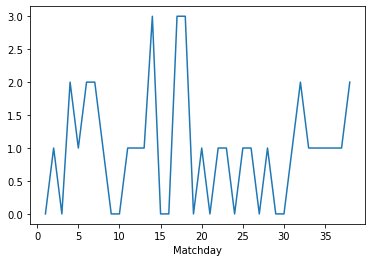

In [127]:
dfmatch=df.groupby(['Matchday'])['Goals'].sum()
dfmatch.plot(x ='Matchday', y='Goals', kind = 'line')
plt.show()


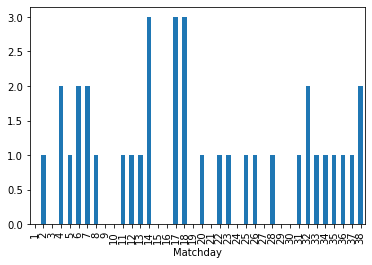

In [128]:
dfmatch.plot(x ='Matchday', y='Goals', kind = 'bar')
plt.show()



Kane Most scored @ round 20,19,34,38 with 7 goals

In [129]:
df.groupby(df['Date'].dt.strftime('%B')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Date,,,,,,,
December,469,7,9,5,0,0,2136
September,83,7,10,0,0,0,1215
November,175,6,5,0,0,0,1181
April,521,3,5,1,0,0,1186
July,209,3,4,0,0,0,455
May,333,3,6,0,0,0,701
February,309,2,4,2,0,0,921
January,402,2,6,1,0,0,1467
June,89,2,0,1,0,0,189


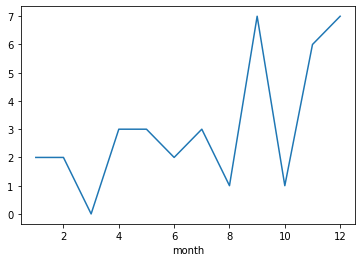

In [130]:

df['month'] = pd.DatetimeIndex(df['Date']).month
df2=df.groupby(df['month'])['Goals'].sum()
df2.plot(x ='month', y='Goals', kind = 'line')
plt.show()


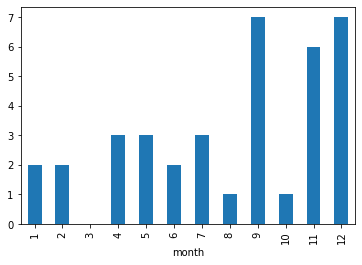

In [131]:
df2.plot(x ='month', y='Goals', kind = 'bar')
plt.show()

KDB never score in  March

In [132]:
df.groupby(df['Date'].dt.strftime('%d')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Date,,,,,,,,
26,141,4,4,1,0,0,758,100
21,193,3,9,1,0,0,985,94
16,113,2,3,0,0,0,426,31
15,134,2,2,0,0,0,465,44
30,88,2,0,0,0,0,345,27
29,133,2,3,2,0,0,466,60
22,110,2,0,0,0,0,212,24
19,109,2,3,0,0,0,529,39
17,44,2,4,0,0,0,297,33


Minutes/goal for liverpool


In [133]:
#df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1
df['Minutes played'].values[df['For']=='Manchester'].sum()/df['Goals'].values[df['For']=='Manchester'].sum()






324.7567567567568

Minutes/goal

In [134]:
df['Minutes played'].sum()/df['Goals'].sum()

328.3243243243243

In [135]:
df.to_csv ('compactMO',index=False)

In [ ]:
df.groupby(['Matchday']).sum().sort_values(['Matchday'])

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Matchday,,,,,,,
1,0,0,0,0,0,132,25
2,4,0,0,0,0,112,17
3,0,0,0,0,0,205,25
4,4,3,0,0,0,247,37
5,2,0,0,0,0,333,45
6,3,1,0,0,0,327,36
7,0,2,0,0,0,324,46
8,0,0,0,0,0,238,40
9,1,0,0,0,0,176,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             164 non-null    int64         
 1   Date                 164 non-null    datetime64[ns]
 2   Venue                164 non-null    object        
 3   For                  164 non-null    object        
 4   Opponent             164 non-null    object        
 5   Result               164 non-null    object        
 6   Pos.                 164 non-null    object        
 7   Goals                164 non-null    int64         
 8   Assists              164 non-null    int64         
 9   Yellow cards         164 non-null    int64         
 10  Second yellow cards  164 non-null    int64         
 11  Red cards            164 non-null    int64         
 12  Minutes played       164 non-null    int64         
 13  month                164 non-null  